<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import the necessary packet

In [0]:
import torch
import torch.nn
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate the toy data y = 5x

In [0]:
X = torch.randn(100, 1)
y = 5*X + torch.randn(100, 1)
print('mean: ', X.mean())
print('std: ', X.std())
print('var: ', X.var())
print('min: ', X.min())
print('max: ', X.max())

mean:  tensor(-0.0824)
std:  tensor(0.9395)
var:  tensor(0.8827)
min:  tensor(-2.5559)
max:  tensor(1.5231)


The code above would create this distribution

Text(0.5, 0, 'x')

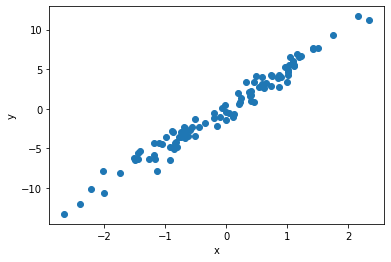

In [0]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

# 2. Model

Now we define the linear regression model

In [0]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

Initialize the model

In [0]:
model = LinearRegression(1, 1)

print(model.parameters())
print(model.state_dict())
print(model.linear.weight.item())
print(model.linear.bias.item())

<generator object Module.parameters at 0x7f92e30d9728>
OrderedDict([('linear.weight', tensor([[-0.0084]])), ('linear.bias', tensor([-0.9822]))])
-0.00836193561553955
-0.982227087020874


Define the function to get the parameters of model and plot the line fit

In [0]:
def get_params(Model):
  [w, b] = Model.parameters()
  return (w[0][0].item(), b[0].item())

def plot_fit(Model, X_axis):
  w1, b1 = get_params(Model)
  x1 = np.array([X_axis.min(), X_axis.max()])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

# 3. Plot the initialized fit line

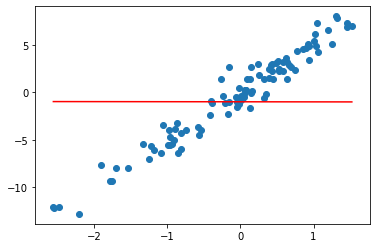

In [0]:
plot_fit(model, X)

Now we define the optimizer/loss function

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [0]:
epochs = 1000
losses = []
for i in range(1, epochs+1):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  if i%100 == 0:
    print('epoch: ', i, ' loss: ', loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  100  loss:  1.8700125217437744
epoch:  200  loss:  1.1560447216033936
epoch:  300  loss:  1.1324403285980225
epoch:  400  loss:  1.131648302078247
epoch:  500  loss:  1.1316213607788086
epoch:  600  loss:  1.1316205263137817
epoch:  700  loss:  1.1316205263137817
epoch:  800  loss:  1.1316205263137817
epoch:  900  loss:  1.1316204071044922
epoch:  1000  loss:  1.1316204071044922


# 5. Plot the result fit line

5.007588863372803 -0.05221762880682945


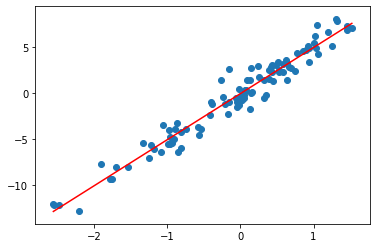

In [0]:
w1, b1 = get_params(model)
print(w1, b1)
plot_fit(model, X)

# 0. Import the necessary packet

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate the toy data y = 5x

In [0]:
X = torch.randn(100, 1)
y = 5*X + torch.randn(100, 1)

The code above would create this distribution

Text(0.5, 0, 'x')

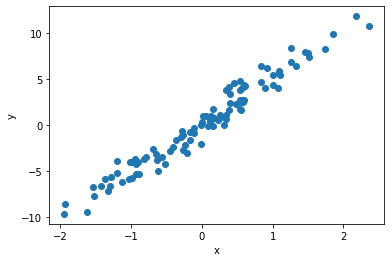

In [23]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

# 2. Model

Now we define the linear regression model

In [0]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

Initialize the model

In [0]:
model = LinearRegression(1, 1)

Define the function to get the parameters of model and plot the line fit

In [0]:
def get_params(Model):
  [w, b] = Model.parameters()
  return (w[0][0].item(), b[0].item())

def plot_fit(Model, X_axis):
  w1, b1 = get_params(Model)
  x1 = np.array([X_axis.min(), X_axis.max()])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

# 3. Plot the initialized fit line

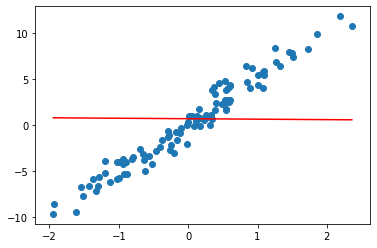

In [27]:
plot_fit(model, X)

Now we define the optimizer/loss function

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# 4. Training

In [29]:
epochs = 1000
losses = []
for i in range(1, epochs+1):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  if i%100==0:
    print('epoch: ', i, ' loss: ', loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  100  loss:  1.7192457914352417
epoch:  200  loss:  0.9703912138938904
epoch:  300  loss:  0.9454689621925354
epoch:  400  loss:  0.9446390867233276
epoch:  500  loss:  0.9446114897727966
epoch:  600  loss:  0.944610595703125
epoch:  700  loss:  0.9446105360984802
epoch:  800  loss:  0.9446104764938354
epoch:  900  loss:  0.9446104764938354
epoch:  1000  loss:  0.9446104764938354


# 5. Plot the result fit line

5.082458972930908 0.11618161201477051


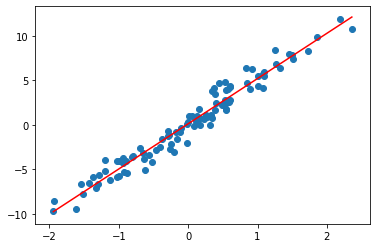

In [30]:
w1, b1 = get_params(model)
print(w1, b1)
plot_fit(model, X)